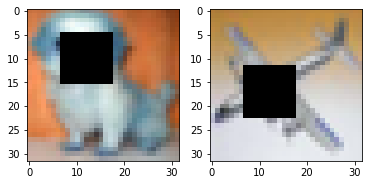

In [28]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def get_file_name(path):
    '''
    ### Get Filename of Filepath ###
    path: path to file
    '''
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname


def cutout(img, gt_boxes, amount=0.5):
    '''
    ### Cutout ###
    img: image
    gt_boxes: format [[obj x1 y1 x2 y2],...]
    amount: num of masks / num of objects 
    '''
    out = img.copy()

    for box in gt_boxes:
        x1 = int(box[1])
        y1 = int(box[2])
        x2 = int(box[3])
        y2 = int(box[4])
        mask_w = int((x2 - x1)*0.5)
        mask_h = int((y2 - y1)*0.5)
        mask_x1 = random.randint(x1, x2 - mask_w)
        mask_y1 = random.randint(y1, y2 - mask_h)
        mask_x2 = mask_x1 + mask_w
        mask_y2 = mask_y1 + mask_h
        cv2.rectangle(out, (mask_x1, mask_y1), (mask_x2, mask_y2), (0, 0, 0), thickness=-1)
    return out

image = cv2.imread('dog4.png')
gt_boxes = [[None,5,5,25,25]]

# Cutout
cutout_1 = cutout(image, gt_boxes, amount=0.5)

image_2 = cv2.imread('airplane4.png')
cutout_2 = cutout(image_2, gt_boxes, amount=0.5)

plt.subplot(1,2,1)
plt.imshow(cutout_1)

plt.subplot(1,2,2)
plt.imshow(cutout_2)
# imgplot = plt.imshow(cutout)
plt.show()